In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1]:
outfile = open("VY2PLA_1H_FMT.txt","r")
data=outfile.readlines()
print(outfile.name)

VY2PLA_1H_FMT.txt


In [2]:
len(data)

50

In [3]:
print(data)

['File: VY2PLA_1H_FMT.txt                       Version: NSSDC 12/31/98 MIT\n', '-------------------------------------------------------------------------\n', '\n', 'The files in this directory contain Voyager hourly average plasma data.\n', 'The plasma parameters are obtained by finding the best fit of a convected\n', 'isotropic Maxwellian distribution to the data. One sigma errors\n', 'are typically less than 0.5% in the speed and VR, less than 5% for the\n', 'density and thermal speed, and vary greatly for VT and VN.\n', 'Sampling times range from 12 to 192 sec., with sampling generally more\n', 'frequent early in the mission. The columns are:\n', '\n', '1) Year                                         \n', '2) day of year (day 1 is Jan. 1)\n', '3) hour\n', '4) proton speed in km/s (magnitude of V)\n', '5) proton density in cm-3\n', '6) proton thermal speed in km/s (proton temperature in eV = .0052 times the\n', 'square of the thermal speed)\n', '7) VR\n', '8) VT (WARNING: this param

In [4]:
for line in data:
        energy_line = line
        print(energy_line,)

('File: VY2PLA_1H_FMT.txt                       Version: NSSDC 12/31/98 MIT\n',)
('-------------------------------------------------------------------------\n',)
('\n',)
('The files in this directory contain Voyager hourly average plasma data.\n',)
('The plasma parameters are obtained by finding the best fit of a convected\n',)
('isotropic Maxwellian distribution to the data. One sigma errors\n',)
('are typically less than 0.5% in the speed and VR, less than 5% for the\n',)
('density and thermal speed, and vary greatly for VT and VN.\n',)
('Sampling times range from 12 to 192 sec., with sampling generally more\n',)
('frequent early in the mission. The columns are:\n',)
('\n',)
('1) Year                                         \n',)
('2) day of year (day 1 is Jan. 1)\n',)
('3) hour\n',)
('4) proton speed in km/s (magnitude of V)\n',)
('5) proton density in cm-3\n',)
('6) proton thermal speed in km/s (proton temperature in eV = .0052 times the\n',)
('square of the thermal speed)\n',)
('7

In [5]:
# that defines the format. Now we want to read the data itself
datafile = open("v2_hour_2007.txt","r")
data=datafile.readlines()
print(datafile.name)

v2_hour_2007.txt


In [6]:
print(len(data))

1728


In [7]:
for line in data[0:4]:
    print(line,)

('2007   1 18  397.4  0.00093   16.5  396.3    2.9  -24.1\n',)
('2007   1 19  389.1  0.00078    8.7  388.8   -4.9   13.9\n',)
('2007   1 20  395.9  0.00063    8.0  395.8   -6.4    6.1\n',)
('2007   2 23  406.4  0.00095   25.2  406.2   10.0   -0.7\n',)


In [10]:
# cycle through each line and find a way to extract
# the year, day of year, hour, proton speed, proton density
# and proton temperature
for line in data[0:4]:
    split_line = line.split()
    print split_line
    print float(split_line[0])
    year = float(split_line[0])
    dayofyear = float(split_line[1])
    hour = float(split_line[2])
    proton_speed_kms = float(split_line[3])
    proton_density_cm3 = float(split_line[4])
    proton_temperature_K = float(split_line[5])**2*0.0052 * 11604.505

['2007', '1', '18', '397.4', '0.00093', '16.5', '396.3', '2.9', '-24.1']
2007.0
['2007', '1', '19', '389.1', '0.00078', '8.7', '388.8', '-4.9', '13.9']
2007.0
['2007', '1', '20', '395.9', '0.00063', '8.0', '395.8', '-6.4', '6.1']
2007.0
['2007', '2', '23', '406.4', '0.00095', '25.2', '406.2', '10.0', '-0.7']
2007.0


In [12]:
#Now store the data in arrays
years = []
days  = []
hours = []
proton_speeds_kms = []
proton_densities_cm3 = []
proton_temperatures_K = []

for line in data:
    split_line = line.split()

    years.append(float(split_line[0]))
    days.append(float(split_line[1]))
    hours.append(float(split_line[2]))
    proton_speeds_kms.append(float(split_line[3]))
    proton_densities_cm3.append(float(split_line[4]))
    proton_temperatures_K.append(float(split_line[5])**2*0.0052 * 11604.505)

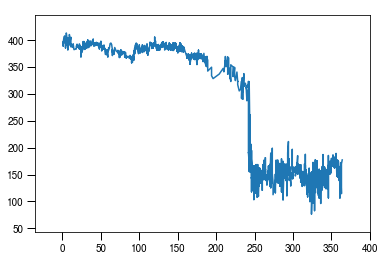

In [15]:
plt.plot(days, proton_speeds_kms)

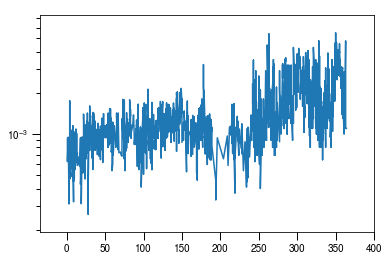

In [16]:
plt.semilogy(days, proton_densities_cm3)

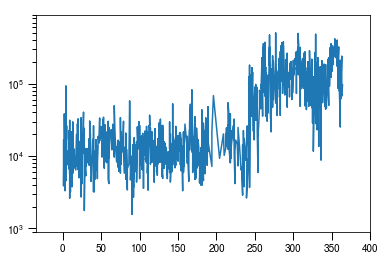

In [17]:
plt.semilogy(days,proton_temperatures_K)

In [21]:
# add write output to a file here
# now let's write our data to some files
import csv

writer = csv.writer(open('proton_speeds_kms.csv', 'w'))
for i,ps in enumerate(proton_speeds_kms):
    writer.writerow([days[i], ps])
writer = csv.writer(open('proton_densities_cm3.csv', 'w'))
for i,pd in enumerate(proton_densities_cm3):
    writer.writerow([days[i], pd])
writer = csv.writer(open('proton_temperatures_K.csv', 'w'))
for i,pt in enumerate(proton_temperatures_K):
    writer.writerow([days[i], pt])